In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = load_dataset("conll2003")
train_data = dataset['train']
stop_words = stopwords.words("english")
word_punctuation = list(punctuation)
test_data = dataset['test']

In [ ]:
def encode(w):
    # w : str : a token

    v = np.zeros(4).astype(np.float32)

    # If first character in uppercase
    if w[0].isupper():
        title = 1
    else:
        title = 0

    # All characters in uppercase
    if w.isupper():
        allcaps = 1
    else:
        allcaps = 0

    # Is stopword
    if w.lower() in stop_words:
        sw = 1
    else:
        sw = 0

    # Is punctuation
    if w in word_punctuation:
        punct = 1
    else:
        punct = 0

    v[0] = title
    v[1] = allcaps
    v[2] = sw
    v[3] = punct

    return v

In [ ]:
def processdata(data):
    features = [] # feature array, one vector per word in the corpus
    labels = [] # labels (0/1)

    for d in data:

        tokens = d["tokens"]
        tags = d["ner_tags"]

        l = len(tokens)
        for i in range(l):

            x = encode(w = tokens[i])

            if tags[i] > 0:
                y = 1
            else:
                y = 0

            features.append(x)
            labels.append(y)

    features = np.asarray(features, dtype = np.float32)
    labels = np.asarray(labels, dtype = np.float32)

    return features, labels

In [ ]:
X_train,y_train= processdata(train_data)
X_test,y_test= processdata(test_data)

In [ ]:
model = SVC(C = 1.0, kernel = "linear", class_weight = "balanced", verbose = True)
model.fit(X_train, y_train)

[LibSVM]

SVC(class_weight='balanced', kernel='linear', verbose=True)

In [ ]:
print(X_test)

[[1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
classification_report_result = classification_report(y_test, y_pred, target_names=['No Name', 'Name'])
print(classification_report_result)

              precision    recall  f1-score   support

     No Name       1.00      0.94      0.97     38323
        Name       0.79      0.98      0.87      8112

    accuracy                           0.95     46435
   macro avg       0.89      0.96      0.92     46435
weighted avg       0.96      0.95      0.95     46435



Confusion Matrix:
[[36176  2147]
 [  159  7953]]


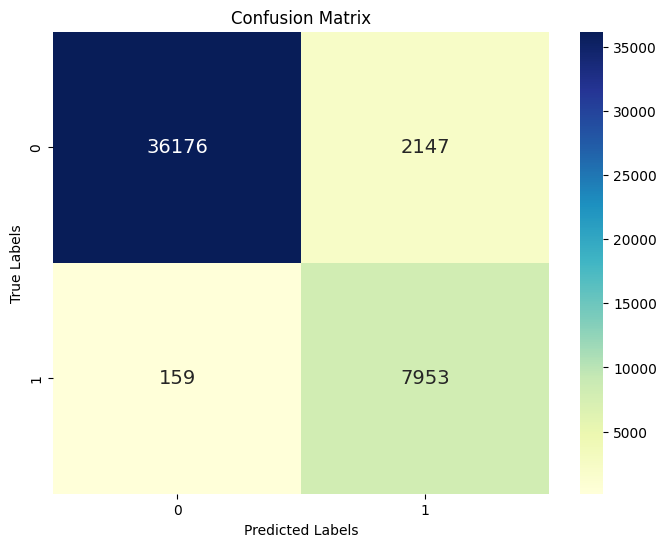

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have already predicted y_test and y_pred using your model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", annot_kws={"size": 14})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def infer(s):
    # s: sentence
    tokens = word_tokenize(s)
    features = []

    l = len(tokens)
    for i in range(l):
        f = encode(w = tokens[i])
        features.append(f)
    features = np.asarray(features, dtype = np.float32)


    pred = model.predict(features)

    return pred, tokens, features

In [ ]:
examples = [
   "Amith and his dog were spotted in the locality of Mumbai."

]

for e in examples:
    pred, tokens, features = infer(e)
    annotated = []
    for w, p in zip(tokens, pred):
        annotated.append(f"{w}_{int(p)}")
    print(" ".join(annotated))
    print()

Amith_1 and_0 his_0 dog_0 were_0 spotted_0 in_0 the_0 locality_0 of_0 Mumbai_1 ._0



In [ ]:
!pip install gradio==3.48.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 29.9 MB/s eta 0:00:00
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.7.0
    Uninstalling gradio_client-0.7.0:
      Successfully uninstalled gradio_client-0.7.0
  Attempting uninstall: gradio
    Found existing installation: gradio 4.7.1
    Uninstalling gradio-4.7.1:
      Successfully uninstalled gradio-4.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
tensorflow-prob

In [ ]:
!pip install typing-extensions==4.5.0

  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.5.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.14.5 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [ ]:
import gradio as gr


# Function to process the model output for Gradio interface
def annotate_text(text):
    pred, tokens,features = infer(text)
    annotated = []
    for w, p in zip(tokens, pred):
        annotated.append(f"{w}_{int(p)}")
    return " ".join(annotated)

# Create a Gradio interface
iface = gr.Interface(
    fn=annotate_text,
    inputs=gr.inputs.Textbox(lines=5, label="Enter a sentence"),
    outputs=gr.outputs.Textbox(label="Annotated Sentence"),
    title="Named Entity Recognition",
    description="Annotate each token in the input sentence as a Named Entity (1) or not (0)."
)

# Launch the Gradio interface
iface.launch()


ImportError: ignored